<div class="alert alert-block alert-info" style="margin-top: 20px">
    <a href="https://cambriancollege.ca/">
         <img src="https://secure.cambriancollege.ca/user_content/staff/Advancement/Logo/CC_vert_505.jpg" width="150" align="center">
    </a>
    
<h1 align=center><font size = 5>ANA 1005: Enterprise Analytics<br><br>
    LAB 6</font></h1>
</div>


<h1>Introduction</h1>
<h3>Welcome!</h3>

<p>
In this Lab you will explore some techniques to deal with skewed data.
</p>

<h2>Table of Contents</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<ol>
    <li><a href="#part1">Log Transform</a></li>
    <li><a href="#part2">Square Root Transform</a></li>
    <li><a href="#part3">Box-Cox Transform</a></li>
    <li><a href="#part4">Inverse for severe skew</a></li>
</ol>

Estimated Time Needed: <strong>60 min</strong>
</div>


<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h1 align=center>Part 1 : Log Transform </h1>
</div>

Import all required Libraries 

In [1]:
#Import Python Libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_csv('marine.csv')

In [3]:
df.head()


,biomassRatio,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7
0,1.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.96,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2.49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.19,NaN,NaN,NaN,NaN,NaN,NaN,\n\n


(array([1.20541001, 0.09773595, 0.22805054, 0.08959128, 0.13845926,
        0.08144662, 0.03257865, 0.00814466, 0.01628932, 0.00814466]),
 array([3.0000e-03, 5.2770e-01, 1.0524e+00, 1.5771e+00, 2.1018e+00,
        2.6265e+00, 3.1512e+00, 3.6759e+00, 4.2006e+00, 4.7253e+00,
        5.2500e+00]),
 <BarContainer object of 10 artists>)

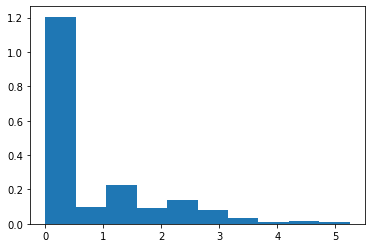

In [4]:
#Use matplotlib to draw a histogram of a salary data
plt.hist(df['biomassRatio'],bins=10, density=True)

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


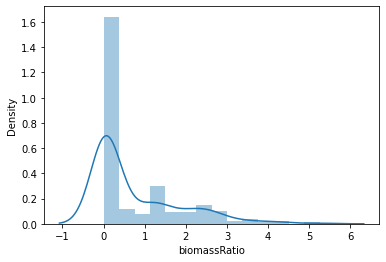

In [5]:
sns.distplot(df['biomassRatio']);

In [6]:
df['biomassRatio'].skew()

1.5475304945338542

In [7]:
df['biomassRatio'].mean()

0.7427008547008543

In [8]:
df['biomassRatio'].mode()

0    0.04
dtype: float64

In [9]:
# Remove the skeweness of the dep_delay variable using the log TRANSFORM METHOD
biomassRatio_log=np.log(df['biomassRatio'])
biomassRatio_log.skew()
biomassRatio_log

0      0.292670
1      0.672944
2      0.912283
3      0.239017
4      0.173953
         ...   
229   -3.218876
230   -4.605170
231   -2.995732
232   -2.813411
233   -3.912023
Name: biomassRatio, Length: 234, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


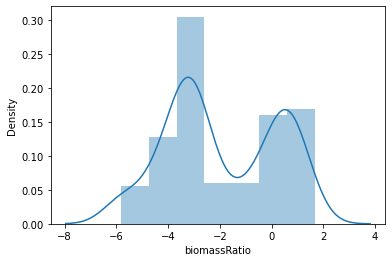

In [10]:
sns.distplot(biomassRatio_log);

---
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h1 align=center>Part 2:  Square Root Transform </h1>
</div>

In [11]:
biomassRatio_squred=np.sqrt(df['biomassRatio'])

biomassRatio_squred.skew()

0.8427171113942766

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


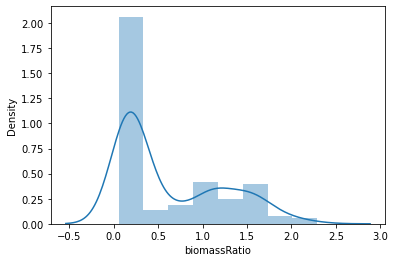

In [12]:
# let us visulaize the result of this Transformation
sns.distplot(biomassRatio_squred);

The skew coefficient went from 5.2 to 2, which still is a notable difference. However, the log transformation ended with better results.

---
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h1 align=center>Part 3: Box-Cox Transform </h1>
</div>

In [13]:
from scipy import stats
biomassRatio_boxcox=stats.boxcox(df['biomassRatio'])[0]


pd.Series(biomassRatio_boxcox).skew()

0.014679333855481324

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


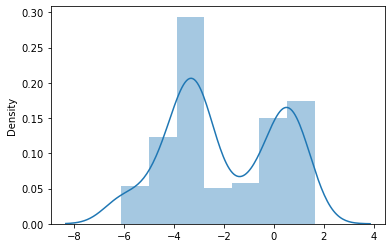

In [14]:
sns.distplot(biomassRatio_boxcox);

The distribution is pretty similar to the one made by the log transformation with less skewness

---

---
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <h1 align=center>Part 4: Inverse for severe skew </h1>
</div>

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


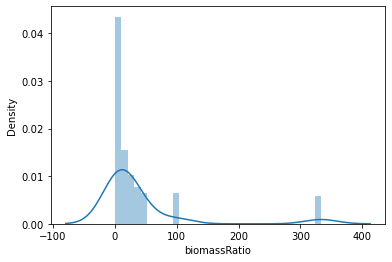

In [15]:
inv_biomas=1/df['biomassRatio']
inv_biomas.skew()
sns.distplot(inv_biomas);

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='biomassRatio', ylabel='Density'>

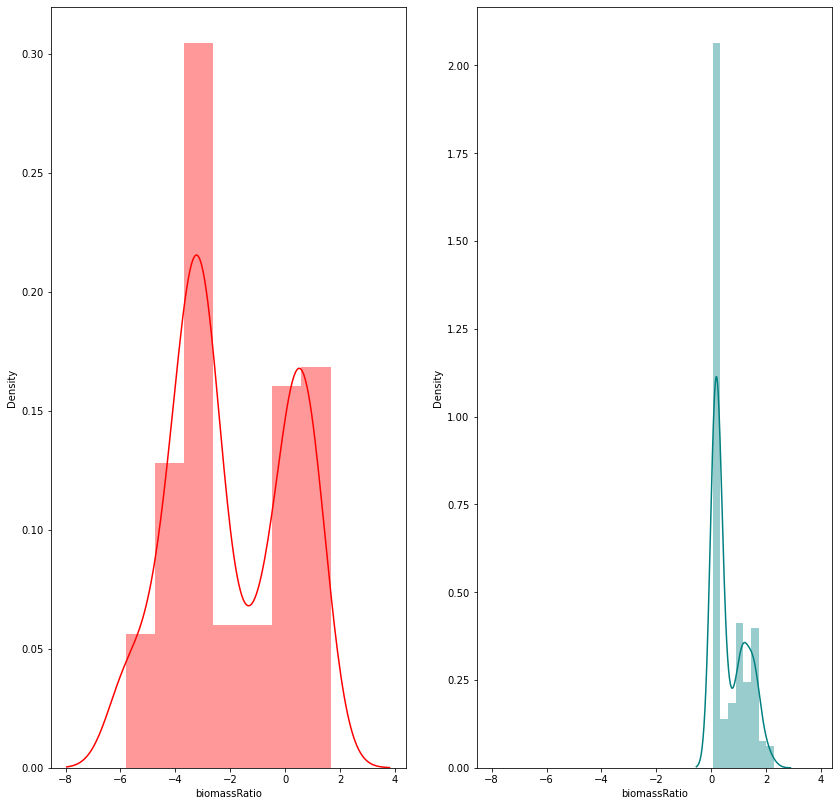

In [16]:
f, axes = plt.subplots(1, 2, figsize=(14, 14), sharex=True)
sns.distplot( biomassRatio_log , color="red", ax=axes[0])
sns.distplot( biomassRatio_squred, color="teal", ax=axes[1])


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='biomassRatio', ylabel='Density'>

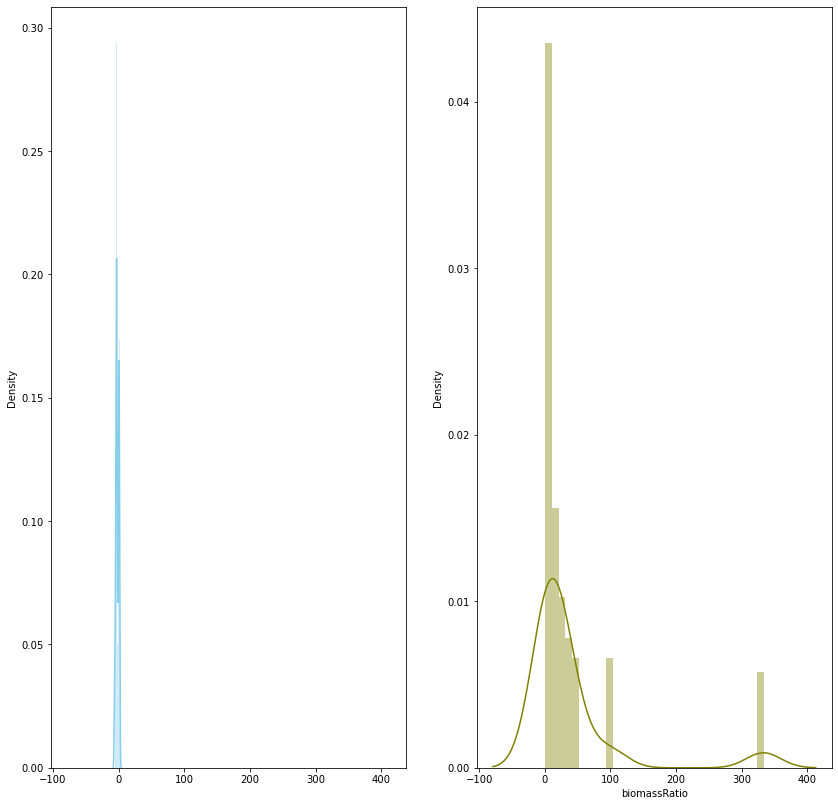

In [17]:
f, axes = plt.subplots(1, 2, figsize=(14, 14), sharex=True)
sns.distplot( biomassRatio_boxcox , color="skyblue", ax=axes[0])
sns.distplot( inv_biomas , color="olive", ax=axes[1])

Now you have completed the Transformation Lab. Answer the following questions.

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #1:</h1>
<b>Use the attached dataset and repeat all Transformation to the Price variable in the dataset</b>
</div>


In [19]:
df_auto=pd.read_csv("auto.csv")

In [20]:
df_auto.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,13495
1,3,122.0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111.0,5000.0,21,27,16500
2,1,122.0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154.0,5000.0,19,26,16500
3,2,164.0,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102.0,5500.0,24,30,13950
4,2,164.0,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115.0,5500.0,18,22,17450


C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


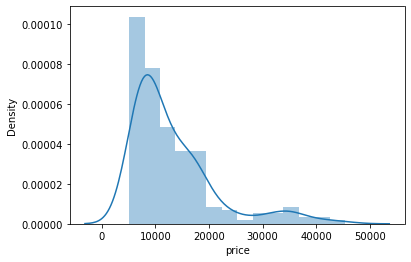

In [21]:
sns.distplot(df_auto['price']);

In [22]:
df_auto['price'].skew()

1.8096753390980749

In [25]:
df_auto['price'].mode()

0      5572
1      6229
2      6692
3      7295
4      7609
5      7775
6      7898
7      7957
8      8495
9      8845
10     8921
11     9279
12    13499
13    16500
14    18150
dtype: int64

In [24]:
df_auto['price'].mean()

13207.129353233831

In [28]:
# Remove the skeweness of the price variable using the log TRANSFORM METHOD
price_log=np.log(df_auto['price'])
price_log.skew()
price_log

0       9.510075
1       9.711116
2       9.711116
3       9.543235
4       9.767095
         ...    
196     9.731809
197     9.854560
198     9.975110
199    10.019936
200    10.026811
Name: price, Length: 201, dtype: float64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


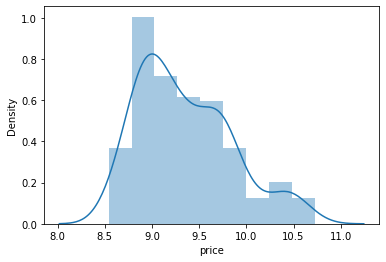

In [29]:
sns.distplot(price_log);

In [30]:
#sqaure root transform
price_squred=np.sqrt(df_auto['price'])
price_squred.skew()


1.2212388755961106

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


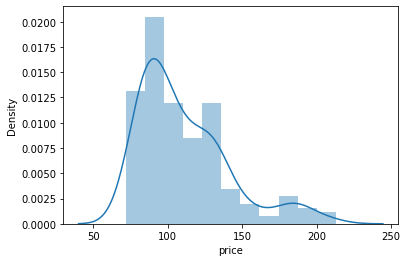

In [31]:
sns.distplot(price_squred);

In [33]:
#Box-Cox Transform

price_boxcox=stats.boxcox(df_auto['price'])[0]


pd.Series(price_boxcox).skew()


0.09332758233423992

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


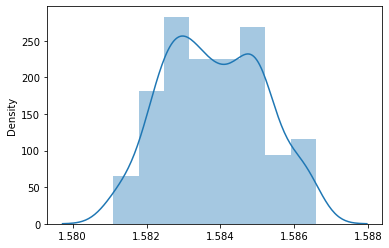

In [34]:
sns.distplot(price_boxcox);

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


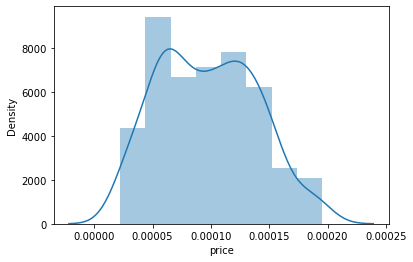

In [35]:
#inverse tranform

inv_price=1/df_auto['price']
inv_price.skew()
sns.distplot(inv_price);



<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #2:</h1>
<b>Which Transfromation method you think the best, Why?</b>
</div>


According to me I think Log transform is better because it has returned neraly normal graph once it has been applied



<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1>Question #3:</h1>
<b>Do you think transformation will work if any missing data, Why?</b>
</div>


No, before performing transformation we need to fix the missing numerical values